In [100]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

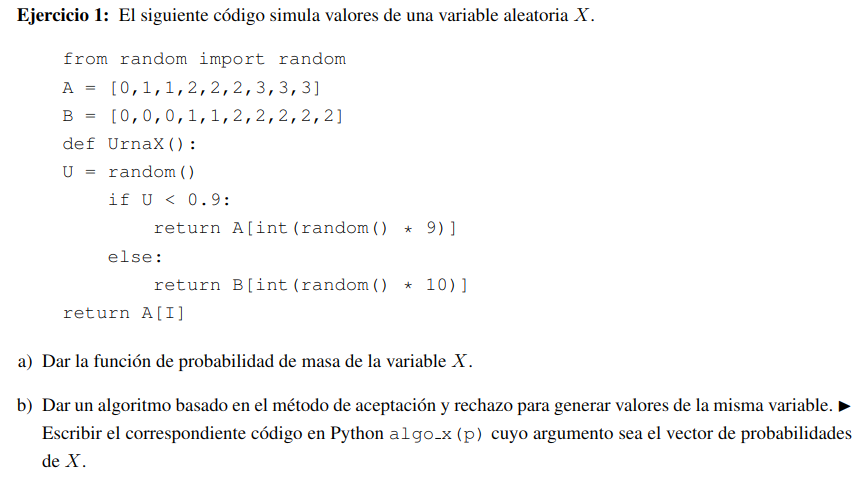

In [101]:
A = [0,1,1,2,2,2,3,3,3]
B = [0,0,0,1,1,2,2,2,2,2]

def urnaX():
    u = rd.random()
    if u <0.9:
        return A[int(rd.random()*9)]
    else:
        return B[int(rd.random()*10)]
    
# calcular las probabilidades de cada valor con 1000000 simulaciones
""" 
values = [urnaX() for i in range(10000000)]
unicos, frecuencias = np.unique(values, return_counts=True)
probabilidades = frecuencias/10000000
print(unicos)
print(probabilidades) 
"""

' \nvalues = [urnaX() for i in range(10000000)]\nunicos, frecuencias = np.unique(values, return_counts=True)\nprobabilidades = frecuencias/10000000\nprint(unicos)\nprint(probabilidades) \n'

Para hacer aceptacion y rechazo, utilizo una variable Y con distribucion uniforme en el {0,1,2,3}
con probabilidad p(i) = 1/4 para i=1,2,3,4. De modo que debo encontrar un c tal que:

$$ \frac{P(X = i)}{P(Y = i)} \leq c  \text{Ambos toman valores en i = 0,1,2,3} \\
\frac{P(X = i)}{1/4} \leq c \rightarrow 4 \cdot P(X = i) \leq c \\
\text{Y el valor maximo que esto toma es c = 1,4}
$$

In [102]:
def gen_uniforme_discreta(m,k):
    return int(rd.random()*(k-m+1)+m)

In [103]:
p = [0.13, 0.22, 0.35, 0.30]

def algo_x(p):
    while True:
        y = gen_uniforme_discreta(0,3)
        u = rd.random()
        if u < p[y]/0.35:
            return y
        
values, frecuencias = np.unique([algo_x(p) for i in range(100000)], return_counts=True)
probabilidades = frecuencias/100000

print(values)
print(probabilidades)


[0 1 2 3]
[0.12879 0.21945 0.35061 0.30115]


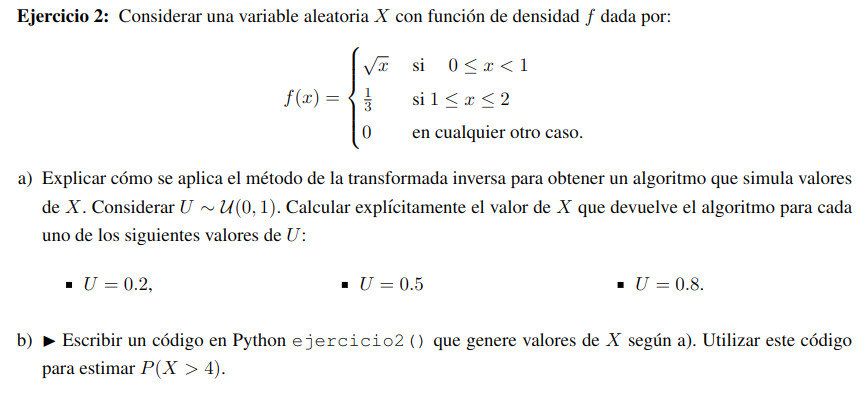

La funcion inversa de la acomulada es:
$$
F^{-1}(u) = \begin{cases} 
\sqrt[3]{\frac{9u^2}{4}} & \text{si } 0 \leq u \lt \frac{2}{3} \\
3u-1 & \text{si } \frac{2}{3} \leq u \leq 1
\end{cases}
$$

In [104]:
def f(x):
    if 0 <= x < 1:
        return x**(1/2)
    elif 1 <= x <= 2:
        return 1/3
    else:
        return 0
    
def F(x):
    if 0 <= x < 1:
        return 2/3*x**(3/2)
    elif 1 <= x <= 2:
        return 2/3 + 1/3*(x-1)
    elif x > 2:
        return 1
    
def F_inv(x):
    if 0 <= x < 2/3:
        return ((9*(x**2))/4)**(1/3)
    elif 2/3 <= x <= 1:
        return 3*x -1

In [105]:
print(F_inv(0.2), F_inv(0.5), F_inv(0.8))

0.44814047465571655 0.8254818122236567 1.4000000000000004


In [106]:
def tinversa_ej2():
    u = rd.random()
    x = F_inv(u)
    return x

def ejercicio2(x):
    # calculo la probabildad de que X > 1
    nsims = 100000
    values = [1 for i in range(nsims) if tinversa_ej2() > x ]
    return sum(values)/nsims

In [107]:
print(f"P(X>1) estimada = {ejercicio2(1)}")
print(f"P(X>1) teorica = {1 - F(1)}")

P(X>1) estimada = 0.3333
P(X>1) teorica = 0.33333333333333337


In [108]:
# grafico el diagrama de barras de los valores generados y sus probabilidaes, junto con el
# grafico de la funcion de distribucion (f(x))

values = [tinversa_ej2() for i in range(100000)]
unicos, frecuencias = np.unique(values, return_counts=True)
probabilidades = frecuencias/100000

x = np.linspace(0, 2.1, 10000) 
y = [f(i) for i in x]
""" 
plt.hist(values, bins=256, density=True, color='b', alpha=0.5, label='valores generados')
plt.plot(x, y, color='r', label='densidad de X')
plt.legend()
plt.grid()
plt.show() """

" \nplt.hist(values, bins=256, density=True, color='b', alpha=0.5, label='valores generados')\nplt.plot(x, y, color='r', label='densidad de X')\nplt.legend()\nplt.grid()\nplt.show() "

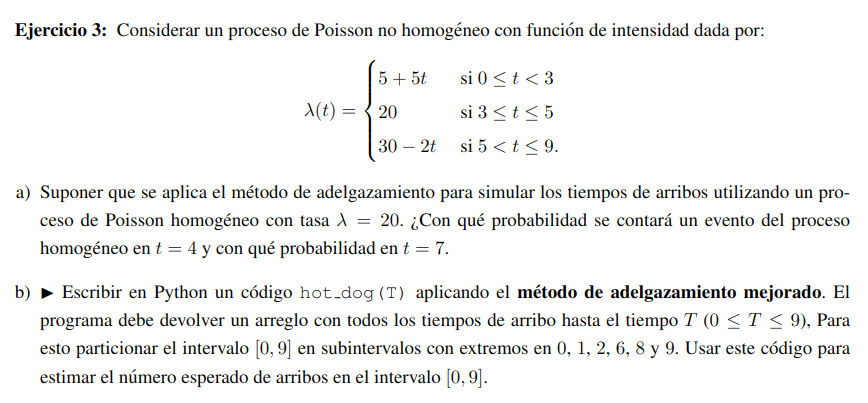

subdivido en intervalos [0,1], [1,2], [2,6], [6,8], [8,9]

In [109]:
def lamda_t(t):
    if 0<= t < 3:
        return 5 + 5*t
    elif 3 <= t <= 5:
        return 20
    elif 5 < t <= 9:
        return 30 - 2*t
    

def hot_dog(T):
    interv = [1, 2, 6, 8, 9]
    lamdas = [10, 15, 20, 18, 14]

    j = 0 # recorre intervalos
    U = 1 - rd.random()
    t = -np.log(U) / lamdas[j] # t0
    NT = 0
    Eventos = []

    while t <= T:
        if t<=interv[j]:
            V = rd.random()
            if V < lamda_t(t) / lamdas[j]:
                NT += 1
                Eventos.append(t)
            t += -np.log(1-rd.random()) / lamdas[j]
        else: # t > interv[j]
            t = interv[j] + (t - interv[j]) * lamdas[j] / lamdas[j+1]
            j += 1

    return NT, Eventos

In [110]:
""" NT, Eventos = hot_dog(9)
print(f"Numero de eventos generados en [0,9] = {NT}")
print(Eventos) """

' NT, Eventos = hot_dog(9)\nprint(f"Numero de eventos generados en [0,9] = {NT}")\nprint(Eventos) '

In [111]:
def arribos_esperados(T):
    arribos = 0
    for i in range(10000):
        arribos += hot_dog(T)[0]
    return arribos/10000

print(f"Arribos esperados simulados en [0,9] = {arribos_esperados(9)}")
print(f"Arribos esperados = {141.5}")

Arribos esperados simulados en [0,9] = 141.4444
Arribos esperados = 141.5


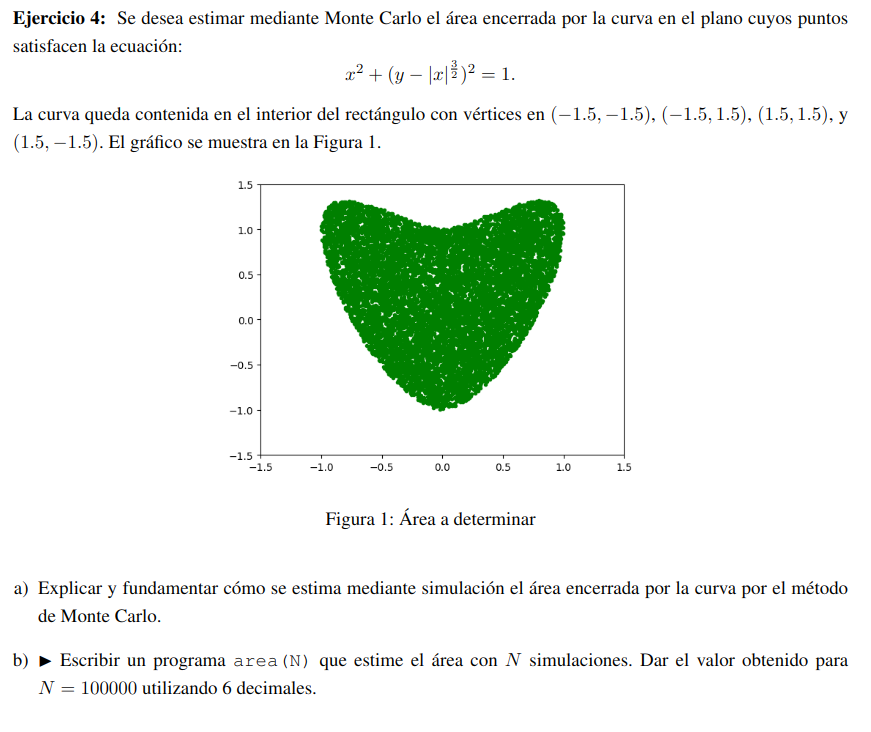

Genero dos valores uniformes dentro del rectanculo, y si esos dos valores caen dentro del area de la funcion, acepto el valor, sino lo rechazo.

In [112]:
def dentro_area(u,v):
    k = u**2 +(v - abs(u)**(3/2))**2
    if k <= 1:
        return 1
    else:
        return 0

def area(N):
    area = 0
    for i in range(N):
        u = rd.uniform(-1.5,1.5)
        v = rd.uniform(-1.5,1.5)
        z = dentro_area(u,v)
        area += dentro_area(u,v)
    
    return area/N
N = 1000000
print(9*area(N))

3.145869
